# Data representation in machine learning

We will use extensively numpy, pandas, and matplotlib libraries over the lectures.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### A Simple Example: the Iris Dataset

Classifiers are algorithms which we will automatically derive statistical rules from a set of data to provide a decision. In this first session, we will focus on the data structure which is usually used. Indeed, we will start by taking a toy dataset called `iris` available in `scikit-learn`.

The data consists of measurements of three different iris flower species. There are three different species of iris in this particular dataset as illustrated below:

<table style="width:100%">
  <tr>
    <th>Species</th>
    <th>Image</th>
  </tr>
  <tr>
    <td>Iris Setosa</td>
    <td><img src="./figures/iris_setosa.jpg" width="80%"></td>
  </tr>
  <tr>
    <td>Iris Versicolor</td>
    <td><img src="./figures/iris_versicolor.jpg" width="80%"></td>
  </tr>
  <tr>
    <td>Iris Virginica</td>
    <td><img src="./figures/iris_virginica.jpg" width="80%"></td>
  </tr>
</table>

Botanists might be interested in differentiating the iris species automatically. Let's check what data they collected about these flowers.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

`iris` is Python dictionary containing all information about the dataset. We can review the different data which we loaded by checking the keys of the dictionary.

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

`iris.data` will contain the measurements done by the botanist while `iris.target` corresponds to the species.

In [4]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
iris.target[:5]

array([0, 0, 0, 0, 0])

Checking the size of the data array, we will be able to understand the data representation

In [6]:
iris.data.shape

(150, 4)

`iris.data` is a 2D array containing 150 rows and 4 columns. Each line is a measurement (i.e., sample) while each column is a flower characteristic (i.e., features).

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Checking the variable `iris.feature_names`, we can infer the characteristics measured by the botanists. Indeed, they measured the length and width of the petal and sepal of the 150 iris flowers. See below to know the difference between a sepal and petal:

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>

(Image: "Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg)

We could use pandas dataframe to organise those information in a single data structure.

In [8]:
df_X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We can have a quick look of the interaction between the different features.

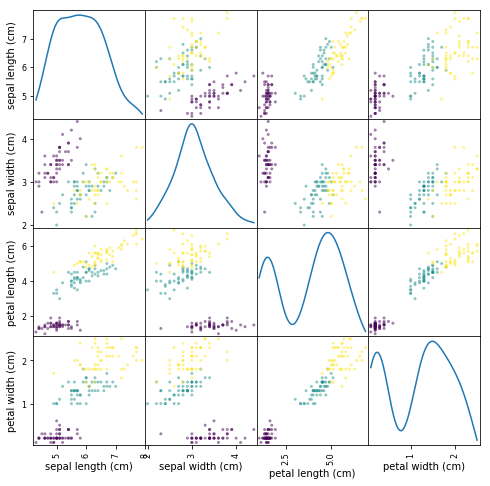

In [9]:
pd.plotting.scatter_matrix(df_X, figsize=(8, 8), diagonal='kde',
                           c=iris.target);

## Exercise

Later, we will work with images. Color images are represented as a 3D array while grayscale image are reprenseted as a 2D array. Let's open an image in Python

In [10]:
import os
from imageio import imread

In [11]:
filename = os.path.join('figures', 'iris_setosa.jpg')
img = imread(filename)

In [12]:
print(img.shape)

(318, 400, 3)


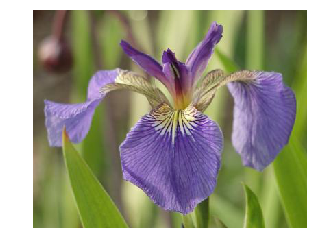

In [13]:
plt.imshow(img)
plt.axis('off');

We could only select one of the channel (e.g., the red channel).

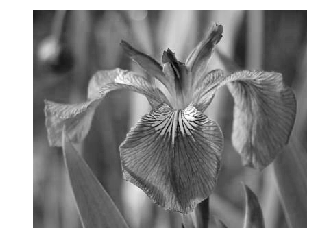

In [14]:
img_red = img[..., 0]
plt.imshow(img_red, cmap=plt.cm.gray)
plt.axis('off');

In [15]:
img_red.shape

(318, 400)

### Questions:

Let's imagine the following classificatioin problem. From the iris dataset, the measurements are not anymore the width and height from the sepal and petals. Instead, the botanists took a picture of each of the sample.

* How would you organize the array of data to follow the structure (n_samples, n_features) as previously done?
* What is required regarding the size of the image?

`scikit-learn` provides a toy dataset named `digits` representing hand-written digits. The idea is to detect which digit is written on each image.

* Load the dataset by importing the function `load_digits` from `sklearn.datasets`.

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

* List the keys of the dictionary created when calling the function `load_digits`

In [17]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

* What is the difference between `data` and `images`? Hint: check the size of those arrays.

In [18]:
digits["images"].shape

(1797, 8, 8)

In [19]:
digits["data"].shape

(1797, 64)

* Plot the first array in `images` using `matplotlib`

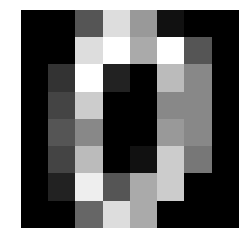

In [20]:
plt.imshow(digits.images[0], cmap=plt.cm.gray)
plt.axis('off');

* Using the array in `data`, reshape the array to be able to plot the same sample which corresponds to the first line. Hint: use the function reshape to get the desired array shape.

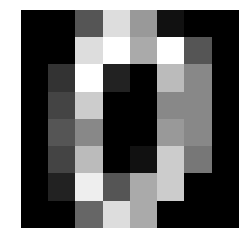

In [21]:
plt.imshow(digits.data[0].reshape((8, 8)), cmap=plt.cm.gray)
plt.axis('off');

Before to go in the next notebook, we will run a machine learning experiment. We will learn a linear classifier on a chunck of the dataset and test our model on the left-out data.

* Import the function `train_test_split` from `sklearn.model_selection`. Check the documentation and split the data into a training and testing sets.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

* Import the following module:
    * `make_pipeline` from `sklearn.pipeline`
    * `MinMaxScaler` from `sklearn.preprocessing`
    * `SGDClassifier` from `sklearn.linear_model`

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier

* Create a `scikit-learn` pipeline by pipelining a scaler and a classifier. Check the documentation of `make_pipeline` if you have some doubts. For the classifier, use the `log` loss instead of the default one.

In [24]:
pipe = make_pipeline(MinMaxScaler(), SGDClassifier(loss='log'))

* Train the classifier only on the training data.

In [25]:
pipe.fit(X_train, y_train)

/home/lemaitre/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('sgdclassifier', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

* We can now evaluate our classifier. Import the `recall_score` from `sklearn.metrics` and use it to check the predictions of our classifier on the testing data. Do not average the results.

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test, pipe.predict(X_test), average=None)

array([1.        , 0.85964912, 1.        , 1.        , 1.        ,
       0.86956522, 0.97619048, 0.94871795, 0.91304348, 0.95744681])